# PREDICT CASES BASED ON MONTHLY TREND

In [8]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('bmh')

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_absolute_error

In [9]:
# read in pickle
df_iq = pd.read_pickle('./datasets/df_iq.pkl')
df_sj = pd.read_pickle('./datasets/df_sj.pkl')

# create month variable
df_sj['month'] = df_sj.index.month
df_iq['month'] = df_iq.index.month

# train test split
#sj
sj_train = df_sj.loc[:'2003-04-20']
sj_Xtrain = sj_train.drop('total_cases', axis = 1)
sj_ytrain = sj_train[['total_cases']]

sj_test = df_sj.loc['2003-04-20':]
sj_Xtest = sj_test.drop('total_cases', axis = 1)
sj_ytest = sj_test[['total_cases']]

#iq
iq_train = df_iq.loc[:'2006-06-20']
iq_Xtrain = iq_train.drop('total_cases', axis = 1)
iq_ytrain = iq_train[['total_cases']]

iq_test = df_iq.loc['2006-06-20':]
iq_Xtest = iq_test.drop('total_cases', axis = 1)
iq_ytest = iq_test[['total_cases']]

In [10]:
# Set up test data to fit into model

# read in test data
test = pd.read_csv('./datasets/dengue_features_test.csv', parse_dates=[3])
submission_format = pd.read_csv('./datasets/submission_format.csv')

#split into cities df
test_sj = test[test['city'] == 'sj']
test_iq = test[test['city'] == 'iq']

# FrontFill to Impute into Missing values
test_sj = test_sj.fillna(method = 'ffill')
test_iq = test_iq.fillna(method = 'ffill')

# set index to the dates
test_sj.set_index('week_start_date', drop = True, inplace = True)
test_iq.set_index('week_start_date', drop = True, inplace = True)

# drop non-numerical values
test_sj.drop(['city', 'year', 'weekofyear'], axis = 1, inplace = True)
test_iq.drop(['city', 'year', 'weekofyear'], axis = 1, inplace = True)

# create month variable
test_sj['month'] = test_sj.index.month
test_iq['month'] = test_iq.index.month

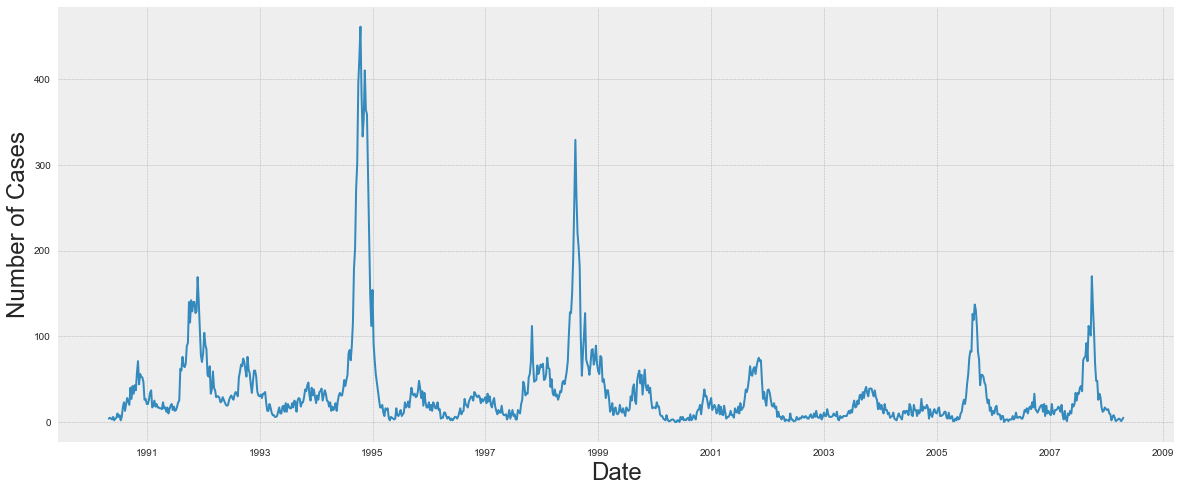

In [11]:
plt.figure(figsize=(20,8))
plt.plot(df_sj['total_cases'])
plt.xlabel('Date', fontsize = 24)
plt.ylabel('Number of Cases', fontsize = 24)


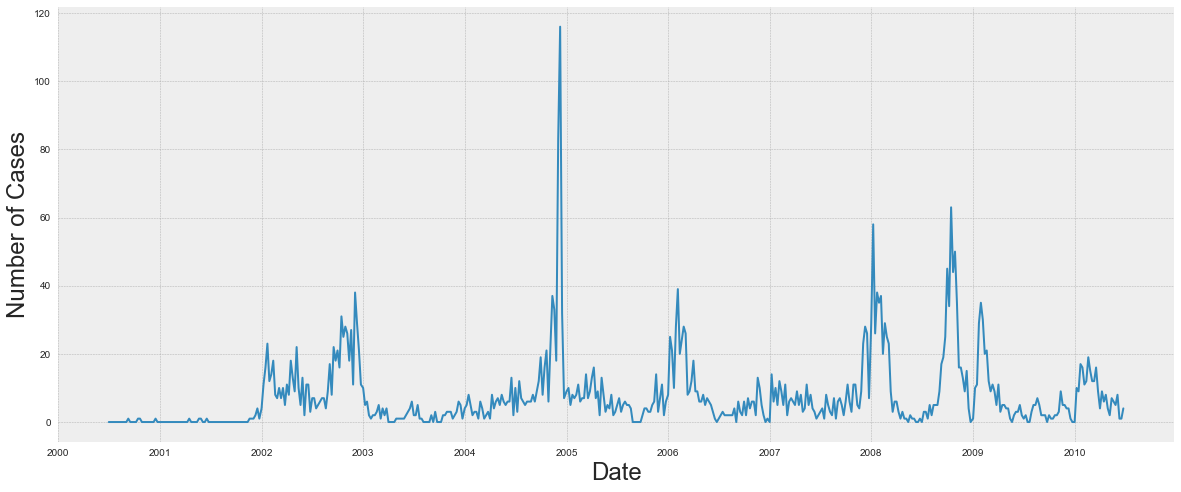

In [12]:
plt.figure(figsize=(20,8))
plt.plot(df_iq['total_cases'])
plt.xlabel('Date', fontsize = 24)
plt.ylabel('Number of Cases', fontsize = 24)

## San Juan and Iquitos - plot trend and all known cases

24.7275641026


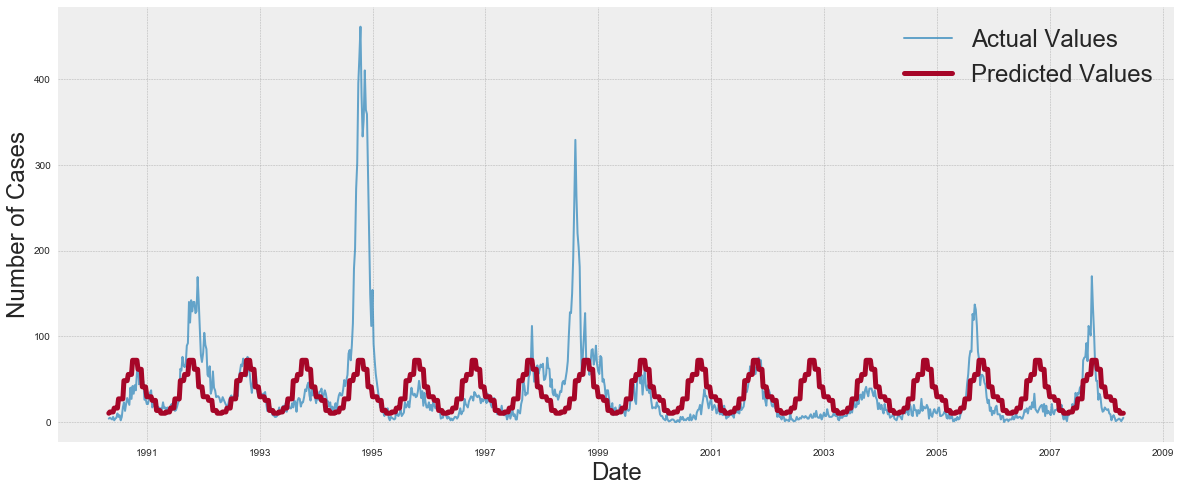

In [13]:
# sj month by month only
lr_sj_months = LinearRegression()
month_dums = pd.get_dummies(df_sj['month'], prefix = 'month')
X = month_dums
y = df_sj['total_cases']
lr_sj_months.fit(X, y)


#predict test values
Xtest = pd.get_dummies(df_sj['month'], prefix='month')
sj_predicts = lr_sj_months.predict(Xtest)
print mean_absolute_error(sj_predicts, y)

# plot predictions
plt.figure(figsize=(20, 8))
plt.plot(df_sj['total_cases'], alpha = .75, label = 'Actual Values')
plt.plot(df_sj['total_cases'].index, sj_predicts, linewidth = 5, label = 'Predicted Values')
plt.legend(fontsize = 24)
# plt.title('San Juan: Monthly Trend of Dengue Fever Cases')
plt.ylabel('Number of Cases', fontsize = 24)
plt.xlabel('Date', fontsize = 24);

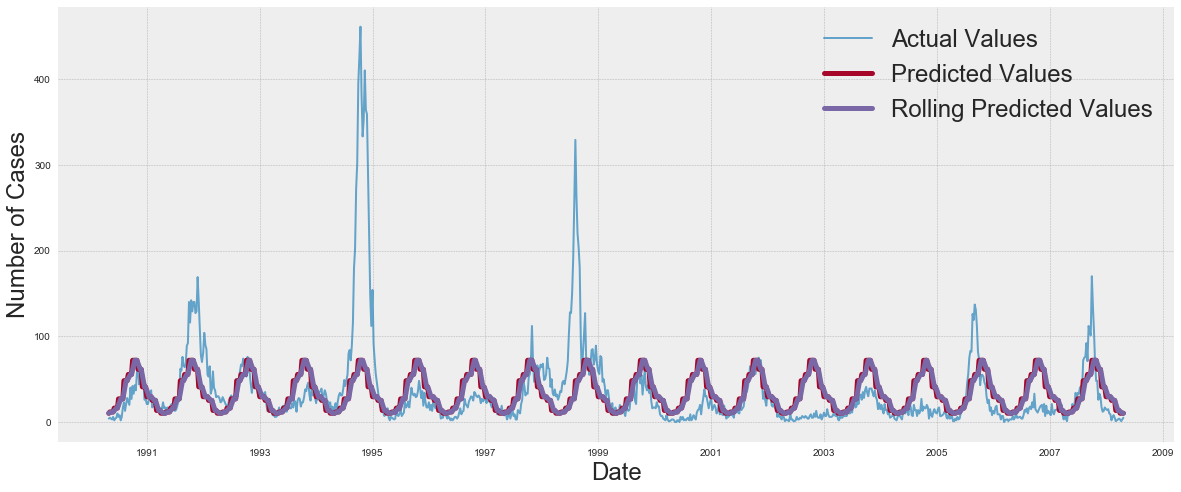

In [14]:
# plot with rolling mean of monthly trend
plt.figure(figsize=(20, 8))
plt.plot(df_sj['total_cases'], alpha = .75, label = 'Actual Values')
plt.plot(df_sj['total_cases'].index, sj_predicts, linewidth = 5, label = 'Predicted Values')
plt.plot(df_sj['total_cases'].index, pd.DataFrame(sj_predicts).rolling(3, min_periods = 1).mean(), 
         linewidth = 5, label = 'Rolling Predicted Values')
plt.legend(fontsize = 24)
# plt.title('San Juan: Monthly Trend of Dengue Fever Cases')
plt.ylabel('Number of Cases', fontsize = 24)
plt.xlabel('Date', fontsize = 24);

### IQ

In [15]:
# iq month by month only
lr_iq_months = LinearRegression()
month_dums = pd.get_dummies(df_iq['month'], prefix = 'month')
X = month_dums
y = df_iq['total_cases']
lr_iq_months.fit(X, y)
# iq_predicts = lr.predict(X)
# plt.plot(iq_predicts)
# plt.plot(y)
# print mean_absolute_error(iq_predicts, y)

#predict test values
Xtest = pd.get_dummies(df_iq['month'], prefix='month')
iq_predicts = lr_iq_months.predict(Xtest)

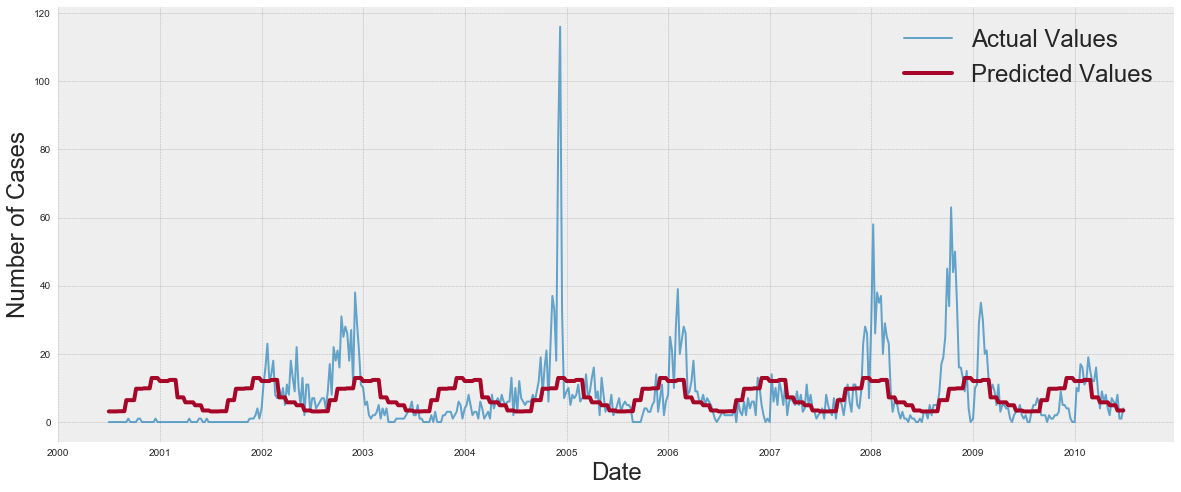

In [20]:
# plot predictions 
plt.figure(figsize=(20, 8))
plt.plot(df_iq['total_cases'], alpha = .75, label = 'Actual Values')
plt.plot(df_iq['total_cases'].index, iq_predicts, linewidth = 4, label = 'Predicted Values')
plt.legend(fontsize = 24)
# plt.title('Iquitos: Monthly Trend of Dengue Fever Cases', fontsize = 24)
plt.ylabel('Number of Cases', fontsize = 24)
plt.xlabel('Date', fontsize = 24)

NameError: name 'iq_predicts_test' is not defined

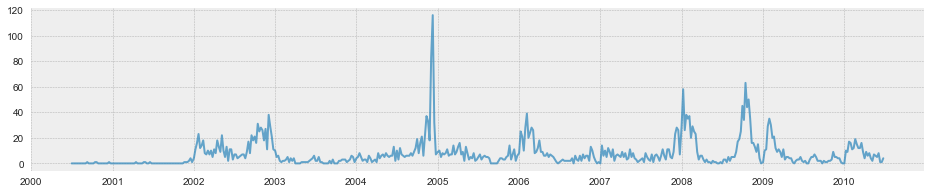

In [8]:
# plot predictions 
plt.figure(figsize=(16, 3))
plt.plot(df_iq['total_cases'], alpha = .75, label = 'Actual Values')
plt.plot(df_iq['total_cases'].index, iq_predicts_test, label = 'Predicted Values')
plt.plot(df_iq['total_cases'].index, pd.DataFrame(iq_predicts).rolling(3, min_periods = 1).mean(), 
         linewidth = 2, label = 'Rolling Predicted Values')
plt.legend()
plt.title('Iquitos: Monthly Trend of Dengue Fever Cases')
plt.ylabel('Number of Cases')
plt.xlabel('Date')

## Submit monthly trend

In [14]:
# submission
submission_format = pd.read_csv('./datasets/submission_format.csv')

In [16]:
submission_format.head()

,city,year,weekofyear,total_cases
0,sj,2008,18,0
1,sj,2008,19,0
2,sj,2008,20,0
3,sj,2008,21,0
4,sj,2008,22,0


In [38]:
# predict, then take rolling mean (window 3), then round to integer

# san juan
sj_test_predicts = pd.Series(lr_sj_months.predict(pd.get_dummies(test_sj['month'])))
# change, or turn this off, to stop the rolling mean
sj_test_predicts = sj_test_predicts.rolling(3, min_periods=1).mean()
sj_test_predicts = sj_test_predicts.apply(lambda x: int(x))

# iquitos
iq_test_predicts = pd.Series(lr_iq_months.predict(pd.get_dummies(test_iq['month'])))
# change, or turn this off, to stop the rolling mean
iq_test_predicts = iq_test_predicts.rolling(3, min_periods=1).mean()
iq_test_predicts = iq_test_predicts.apply(lambda x: int(x))

In [39]:
total_preds = pd.concat([sj_test_predicts, iq_test_predicts], axis = 0)
total_preds.reset_index(drop = True, inplace=True)

In [40]:
print len(total_preds)
print len(submission_format['total_cases'])

# monthly_preds = sj_predicts.append(iq_predicts).reset_index(drop = True)

416
416


In [36]:
submission_format['total_cases'] = total_preds

In [37]:
# Save to CSV, use current date
submission_format.to_csv('submissions/dengue_submission_9_16_17v1.csv', index=False)

#### Notes on DrivenData Submissions:
* Montly trend alone MAE is 26.5
* Monthly trend with rolling window = 3, MAE is 25.8
* Use rolling window to makre residual predictions from now on.
* Look into this more, but only on days when I won't hit three submissions. No point in train test split the normal data, this is closer to random chance I think.